# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Raka Arfinarendra
- **Email:** rakaarfi@gmail.com
- **ID Dicoding:** rakaarfi

## Menentukan Pertanyaan Bisnis

1. When was the last significant drop in bike rentals?
2. How is the distribution of bike rentals throughout the hours of the day?
3. How does the average bike rental vary by hour for weekdays and weekends/holidays?
4. RFM Analysis:
    - Recency (R): What is the pattern of rental changes in the recent periods?
    - Frequency (F): Is there any seasonal or weekly pattern in the frequency of usage?
    - Monetary (M): Are casual users more sensitive to weather conditions compared to registered users?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

ModuleNotFoundError: No module named 'numpy'

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai tabel `day_df`

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
# count missing values
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# count duplicates
day_df.duplicated().sum()

np.int64(0)

In [8]:
# show descriptive statistics
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


#### Menilai tabel `hour_df`

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
# count missing values
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
# count duplicates
hour_df.duplicated().sum()

np.int64(0)

In [12]:
# show descriptive statistics
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- There's a data type mistake in the `dteday` column in both tables.

### Cleaning Data

In [13]:
# mengubah tipe data
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [14]:
# mengubah tipe data
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

**Insight:**
- The data type of the `dteday` column has been changed to `datetime`.

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [15]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
336,337,2011-12-03,4,0,12,0,6,0,1,0.299167,0.310604,0.612917,0.095783,706,2908,3614
98,99,2011-04-09,2,0,4,0,6,0,2,0.342500,0.341529,0.877500,0.133083,879,1576,2455
203,204,2011-07-23,3,0,7,0,6,0,1,0.849167,0.804287,0.500000,0.131221,987,2298,3285
333,334,2011-11-30,4,0,11,0,3,1,1,0.325000,0.311221,0.613333,0.271158,188,3425,3613
721,722,2012-12-22,1,1,12,0,6,0,1,0.265833,0.236113,0.441250,0.407346,205,1544,1749


In [16]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [17]:
# Show the total number of rentals per day
day_df.groupby('dteday')['cnt'].sum().reset_index().sort_values('dteday')

,dteday,cnt
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600
...,...,...
726,2012-12-27,2114
727,2012-12-28,3095
728,2012-12-29,1341
729,2012-12-30,1796


In [18]:
# Show the average number of rentals per season
day_df.groupby('season')['cnt'].mean().reset_index()

,season,cnt
0,1,2604.132597
1,2,4992.331522
2,3,5644.303191
3,4,4728.162921


In [19]:
# Show the average number of rentals per day
day_df.groupby('weekday')['cnt'].mean().reset_index().sort_values('weekday')

,weekday,cnt
0,0,4228.828571
1,1,4338.123810
2,2,4510.663462
3,3,4548.538462
4,4,4667.259615
5,5,4690.288462
6,6,4550.542857


In [20]:
# Show the average number of casual and registered users per weather situation
day_df.groupby('weathersit')[['casual', 'registered']].mean().reset_index()

,weathersit,casual,registered
0,1,964.030238,3912.755940
1,2,687.352227,3348.510121
2,3,185.476190,1617.809524


### Explore `hour_df`

In [21]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
13802,13803,2012-08-03,3,1,8,7,0,5,1,1,0.70,0.6667,0.74,0.1045,25,396,421
10200,10201,2012-03-06,1,1,3,2,0,2,1,1,0.20,0.1970,0.44,0.2239,0,4,4
6256,6257,2011-09-23,4,0,9,6,0,5,1,2,0.62,0.5455,0.94,0.0896,5,99,104
8613,8614,2011-12-30,1,0,12,16,0,5,1,1,0.42,0.4242,0.47,0.1940,36,247,283
7597,7598,2011-11-18,4,0,11,4,0,5,1,1,0.22,0.2273,0.44,0.1642,0,5,5


In [22]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [23]:
# Show the average number of rentals per hour
hour_df.groupby('hr')['cnt'].mean().reset_index().sort_values('cnt', ascending=False)

,hr,cnt
17,17,461.452055
18,18,425.510989
8,8,359.011004
16,16,311.983562
19,19,311.523352
13,13,253.661180
12,12,253.315934
15,15,251.233196
14,14,240.949246
20,20,226.030220


In [24]:
# Show the average number of rentals per hour based on day status
hour_df.groupby(['hr', 'workingday'])['cnt'].mean().reset_index()

,hr,workingday,cnt
0,0,0,90.800000
1,0,1,36.786290
2,1,0,69.508696
3,1,1,16.552632
4,2,0,53.171053
5,2,1,8.683778
6,3,0,25.775330
7,3,1,4.942553
8,4,0,8.264317
9,4,1,5.429787


## Visualization & Explanatory Analysis

### **Question 1:** When was the last significant drop in bike rentals?

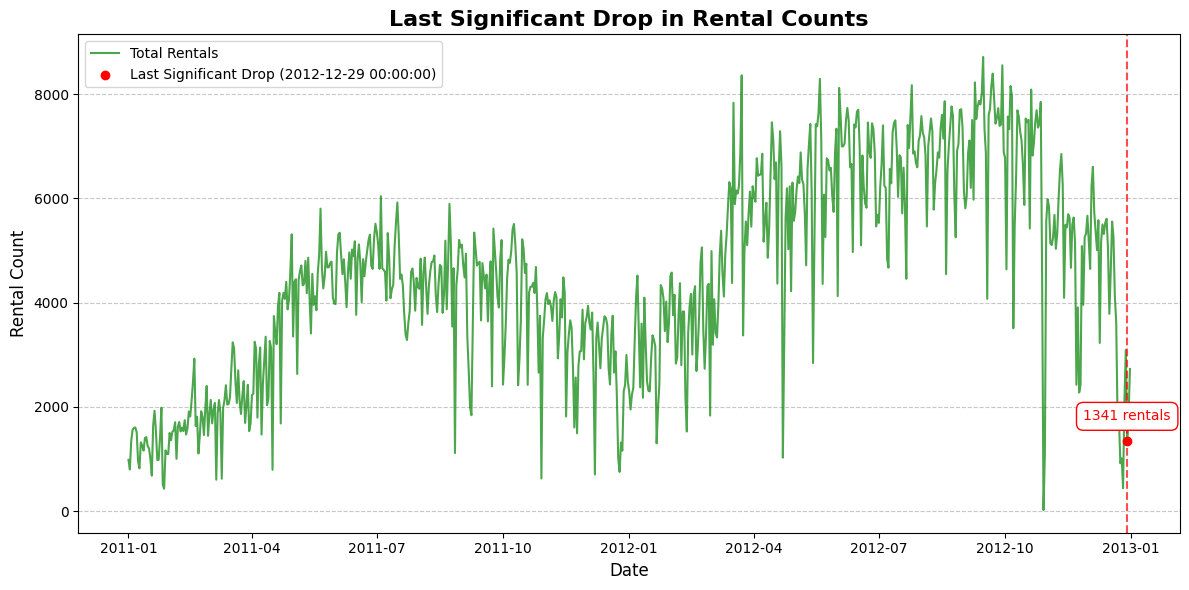

In [25]:
# Calculate daily changes in rental counts
day_df['daily_change'] = day_df['cnt'].diff()

# Identify the last significant drop (threshold: top 5% largest negative changes)
threshold = day_df['daily_change'].quantile(0.05)  # 5th percentile (largest negative changes)
last_significant_drop = day_df[day_df['daily_change'] < threshold].iloc[-1]  # Last significant drop

plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(day_df['dteday']), day_df['cnt'], label='Total Rentals', color='green', alpha=0.7)
plt.scatter(pd.to_datetime(last_significant_drop['dteday']), last_significant_drop['cnt'], 
            color='red', label=f"Last Significant Drop ({last_significant_drop['dteday']})", zorder=5)
plt.axvline(pd.to_datetime(last_significant_drop['dteday']), color='red', linestyle='--', alpha=0.7)
plt.title('Last Significant Drop in Rental Counts', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rental Count', fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating the last significant drop with background color and shadow
plt.text(pd.to_datetime(last_significant_drop['dteday']), last_significant_drop['cnt'] + (last_significant_drop['cnt'] * 0.3), 
         f"{last_significant_drop['cnt']} rentals", color='red', ha='center', fontsize=10,
         bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.5') # Background color with border
)

plt.tight_layout()
plt.show()

**Insights**
1. The last significant drop occurred in late 2012, marked by a sharp decline in rentals, possibly indicating external factors like weather, holidays, or operational issues.
2. Overall, rental activity showed consistent fluctuations with peaks in mid-2012 and subsequent declines toward the end of the year.

### **Question 2:** How is the distribution of bike rentals throughout the hours of the day?

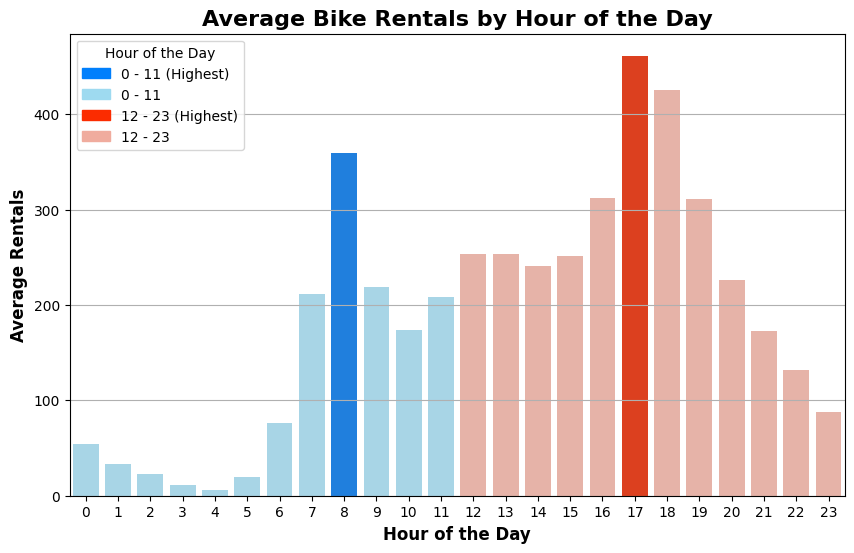

In [26]:
hourly_rentals = hour_df.groupby('hr')['cnt'].mean()
am_hour = hourly_rentals[0:12]
pm_hour = hourly_rentals[12:24]

max_am = am_hour.max() # Highest rental in the AM
max_pm = pm_hour.max() # Highest rental in the PM

colors_ = []
for hour in am_hour.values:
    if hour == max_am:
        colors_.append('#007ffc')
    else:
        colors_.append('#9edaf0')

for hour in pm_hour.values:
    if hour == max_pm:
        colors_.append('#fb2c00')
    else:
        colors_.append('#f0ac9e')

# Color for legend
am_patch = mpatches.Patch(color='#007ffc', label='0 - 11 (Highest)')
am_low_patch = mpatches.Patch(color='#9edaf0', label='0 - 11')
pm_patch = mpatches.Patch(color='#fb2c00', label='12 - 23 (Highest)')
pm_low_patch = mpatches.Patch(color='#f0ac9e', label='12 - 23')

plt.figure(figsize=(10, 6))
sns.barplot(
    x=hourly_rentals.index, 
    y=hourly_rentals.values,
    palette=colors_,
    hue=hourly_rentals.index)

plt.title('Average Bike Rentals by Hour of the Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=12, fontweight='bold')
plt.ylabel('Average Rentals', fontsize=12, fontweight='bold')
plt.grid(axis='y')
plt.legend(handles=[am_patch, am_low_patch, pm_patch, pm_low_patch], 
           title='Hour of the Day')

plt.show()

**Insight:**
- The distribution of average rentals by hour shows a clear pattern. The peak rentals occur during the busy morning hours (around 8) and evening hours (around 17), which are most likely associated with commuter activities.

### **Question 3**: How does the average bike rental vary by hour for weekdays and weekends/holidays?

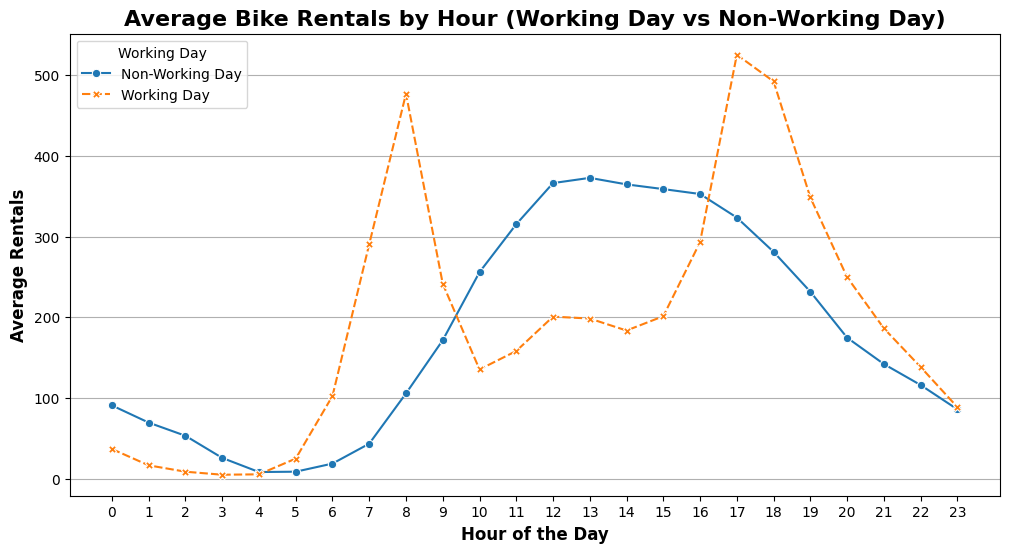

In [27]:
hourly_rentals_by_day_type = hour_df.groupby(['hr', 'workingday'])['cnt'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    data=hourly_rentals_by_day_type,
    x='hr', y='cnt', hue='workingday', 
    style='workingday', markers=True
)

plt.title('Average Bike Rentals by Hour (Working Day vs Non-Working Day)', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=12, fontweight='bold')
plt.ylabel('Average Rentals', fontsize=12, fontweight='bold')
plt.xticks(range(0, 24), rotation=0)

# Move legend to upper left
sns.move_legend(ax, "upper left", title="Working Day", labels=["Non-Working Day", "Working Day"])

plt.grid(axis='y')
plt.show()


**Insight:**
- On weekends or holidays (non-working days), the rental distribution is more evenly spread throughout the day, with a later peak (around 12 PM to 3 PM), indicating recreational use.

## Analisis Lanjutan (Opsional)

RFM Analysis:
- Recency (R): What is the pattern of rental changes in the recent periods?
- Frequency (F): Is there any seasonal or weekly pattern in the frequency of usage?
- Monetary (M): Are casual users more sensitive to weather conditions compared to registered users?

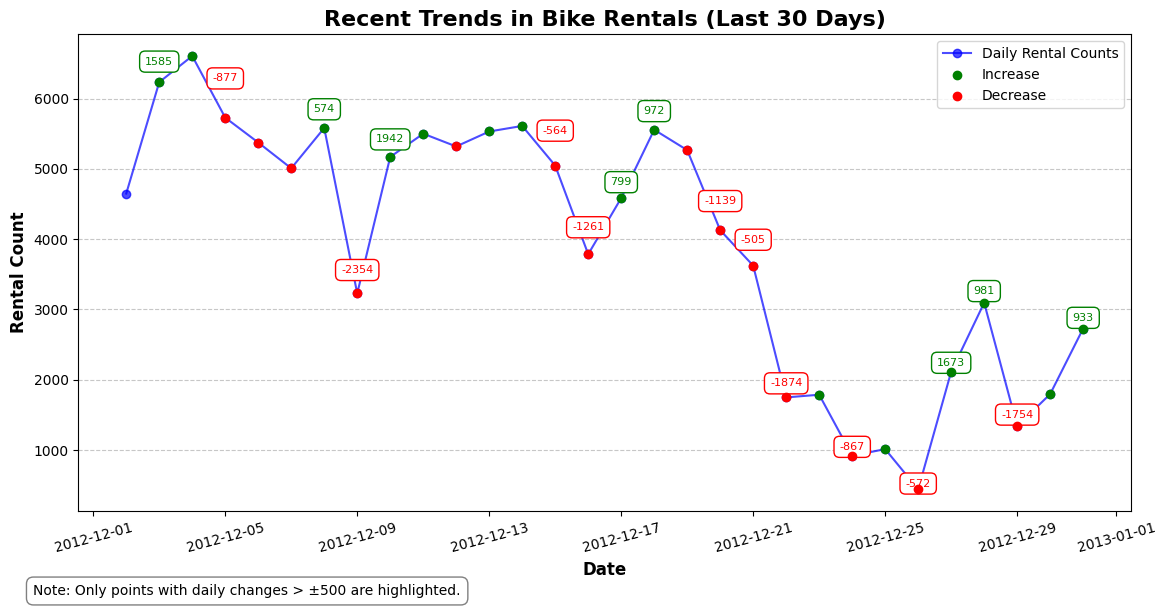

In [28]:
# -------------------------------
# 1. Recency (R)
# -------------------------------
# Focus on the last 30 days to observe recent trends
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
recent_data = day_df.sort_values(by='dteday').tail(30)

# Calculate daily changes
recent_data['daily_change'] = recent_data['cnt'].diff()

plt.figure(figsize=(12, 6))

# Line plot for rental counts
line_plot, = plt.plot(recent_data['dteday'], recent_data['cnt'], marker='o', label='Daily Rental Counts', color='blue', alpha=0.7)

# Highlight increasing and decreasing trends
for i in range(1, len(recent_data)):
    if recent_data['daily_change'].iloc[i] > 0:
        plt.scatter(recent_data['dteday'].iloc[i], recent_data['cnt'].iloc[i], color='green', zorder=5)
        if abs(recent_data['daily_change'].iloc[i]) > 500:  # Menyesuaikan ambang perubahan signifikan
            plt.text(recent_data['dteday'].iloc[i], recent_data['cnt'].iloc[i] + (recent_data['cnt'].iloc[i] * 0.04), 
                     f"{int(recent_data['daily_change'].iloc[i])}", color='green', ha='center', fontsize=8,
                     bbox=dict(facecolor='white', edgecolor='green', boxstyle='round,pad=0.5'))  # Background color with border
            
    elif recent_data['daily_change'].iloc[i] < 0:
        plt.scatter(recent_data['dteday'].iloc[i], recent_data['cnt'].iloc[i], color='red', zorder=5)
        if abs(recent_data['daily_change'].iloc[i]) > 500:  # Menyesuaikan ambang perubahan signifikan
            plt.text(recent_data['dteday'].iloc[i], recent_data['cnt'].iloc[i] + (recent_data['cnt'].iloc[i] * 0.09), 
                     f"{int(recent_data['daily_change'].iloc[i])}", color='red', ha='center', fontsize=8,
                     bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.5'))  # Background color with border

# Create dummy scatter plots for the legend
scatter_increase = plt.scatter([], [], color='green', label='Increase')
scatter_decrease = plt.scatter([], [], color='red', label='Decrease')

# Use elements directly from the plot for the legend
plt.legend(handles=[line_plot, scatter_increase, scatter_decrease], labels=['Daily Rental Counts', 'Increase', 'Decrease'], fontsize=10)

# Add a note at the bottom-left corner
plt.text(0.05, 0, # Position relative to the figure
         "Note: Only points with daily changes > ±500 are highlighted.",
         fontsize=10, color='black', bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'),
         transform=plt.gcf().transFigure)

# Customizing the plot
plt.title('Recent Trends in Bike Rentals (Last 30 Days)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Rental Count', fontsize=12, fontweight='bold')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insights**:
1. Recent Variability:
    - The last 30 days show significant fluctuations in rental counts, with noticeable drops around mid and late December.
    - Rental counts began recovering slightly towards the end of December.
2. Consistent Decline During Holidays:  
    - A steady decline is visible around major holiday dates (e.g., December 25th), which might indicate seasonal or holiday effects on demand.

**Conclusion**:
- The visualization highlights short-term volatility in bike rentals, with clear markers for increases and decreases. Adding annotations and thresholds improves interpretability. This analysis can help guide short-term operational adjustments, especially during seasonal or holiday periods.

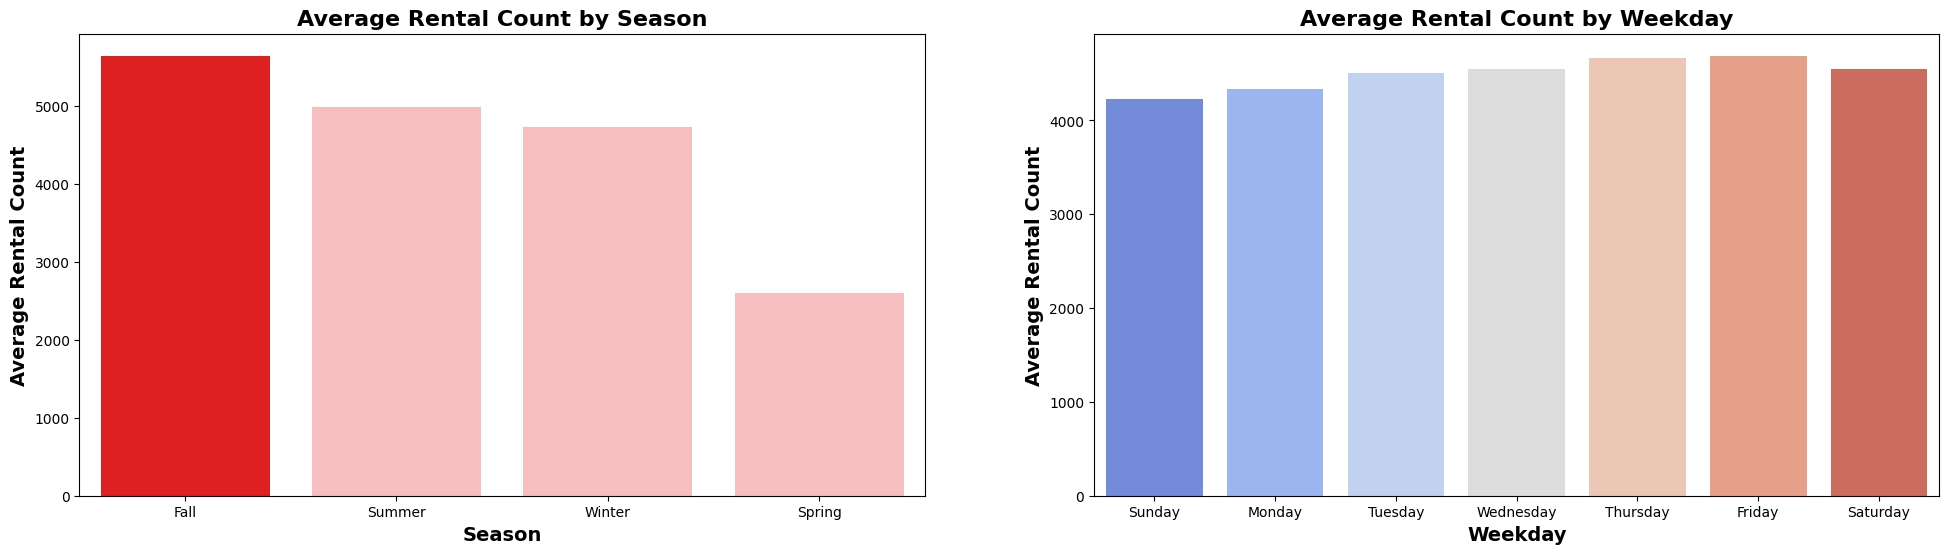

In [29]:
# -------------------------------
# 2. Frequency (F)
# -------------------------------
# Add a 'season' label for better visualization
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season_label'] = day_df['season'].map(season_map)

# Add a 'day' label for better visualization
day_map = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 0: 'Sunday'}
day_df['day_label'] = day_df['weekday'].map(day_map)

# Aggregate data to calculate average rentals by season and weekday
seasonal_frequency = day_df.groupby('season_label')['cnt'].mean().reset_index().sort_values('cnt', ascending=False)
weekday_frequency = day_df.groupby(['day_label', 'weekday'])['cnt'].mean().reset_index().sort_values('weekday')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Plot Frequency - Season
colors = ["#ff0000", "#ffb5b5", "#ffb5b5", "#ffb5b5"]

sns.barplot(x='season_label', y='cnt', data=seasonal_frequency, palette=colors, hue='season_label', ax=ax[0])
ax[0].set_title('Average Rental Count by Season', fontsize=16, fontweight='bold')
ax[0].set_xlabel('Season', fontsize=14, fontweight='bold')
ax[0].set_ylabel('Average Rental Count', fontsize=14, fontweight='bold')

# Plot Frequency - Weekday
sns.barplot(x='day_label', y='cnt', data=weekday_frequency, palette='coolwarm', hue='day_label', ax=ax[1])
ax[1].set_title('Average Rental Count by Weekday', fontsize=16, fontweight='bold')
ax[1].set_xlabel('Weekday', fontsize=14, fontweight='bold')
ax[1].set_ylabel('Average Rental Count', fontsize=14, fontweight='bold')

plt.show()

**Insights**:
1. Seasonal Pattern:
    - Fall has the highest average rental counts, followed by Summer, Winter, and Spring. This indicates a strong seasonal preference, with Fall being the most popular.
2. Weekly Pattern:
    - Rentals are relatively consistent throughout the week, but weekends (Saturday and Sunday) show slightly higher averages compared to weekdays, suggesting increased leisure usage.

**Conclusion**:
- There is a clear seasonal pattern, with Fall being the peak season, and a weekly pattern, where weekends are slightly more popular for bike rentals. These insights can inform marketing and operational strategies for targeted periods.

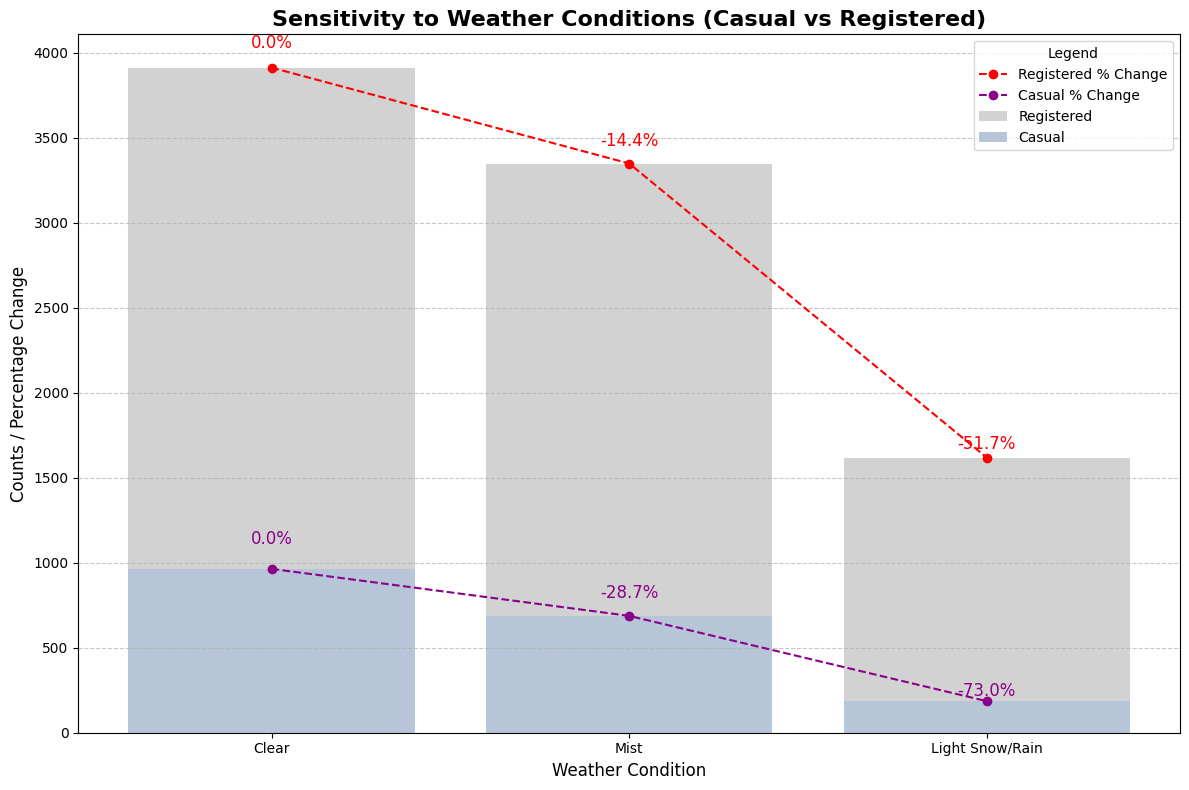

In [30]:
# -------------------------------
# 3. Monetary (M)
# -------------------------------
# Analyze sensitivity of casual vs registered users to weather conditions
weather_sensitivity = day_df.groupby('weathersit')[['casual', 'registered']].mean().reset_index()
length = len(weather_sensitivity)
casual_count = weather_sensitivity['casual']
registered_count = weather_sensitivity['registered']

# Plot Monetary - Weather Sensitivity
weather_labels = {1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}
weather_sensitivity['weather_label'] = weather_sensitivity['weathersit'].map(weather_labels)
weather_name = weather_sensitivity['weather_label']

# Calculate percentage change casual
percent_change_casual = [0]  # First season has no previous data
for i in range(1, length):
    change = ((casual_count[i] - casual_count[i - 1]) / casual_count[i - 1]) * 100
    percent_change_casual.append(change)

# Calculate percentage change registered
percent_change_registered = [0]  # First season has no previous data
for i in range(1, length):
    change = ((registered_count[i] - registered_count[i - 1]) / registered_count[i - 1]) * 100
    percent_change_registered.append(change)

# Plotting combined bar chart and line plots for casual and registered users
plt.figure(figsize=(12, 8))

sns.barplot(x=weather_name, y=registered_count, data=weather_sensitivity, color='silver', alpha=0.7, label='Registered')
sns.barplot(x=weather_name, y=casual_count, data=weather_sensitivity, color='lightsteelblue', label='Casual')

# Adding percentage change lines
plt.plot(weather_name, registered_count, marker='o', color='red', label='Registered % Change', linestyle='--')
plt.plot(weather_name, casual_count, marker='o', color='darkmagenta', label='Casual % Change', linestyle='--')

# Customizing the plot
plt.title('Sensitivity to Weather Conditions (Casual vs Registered)', fontsize=16, weight='bold')
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Counts / Percentage Change', fontsize=12)
plt.legend(title='Legend', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating the bar and line plots
for i in range(length):
    # Annotating percentage changes
    plt.text(i, registered_count[i] + (registered_count[i] * 0.03), f"{percent_change_registered[i]:.1f}%", ha='center', color='red', fontsize=12)
    plt.text(i, casual_count[i] + (casual_count[i] * 0.15), f"{percent_change_casual[i]:.1f}%", ha='center', color='darkmagenta', fontsize=12)


# Show the plot
plt.tight_layout()
plt.show()

**Insights**:
1. Weather Sensitivity:
    - Casual users show a steep decline in usage as weather worsens (-28.7% in mist, -73.0% in light snow/rain).
    - Registered users are less affected, with smaller declines (-14.4% in mist, -51.7% in light snow/rain).
2. Stability:
    - Registered users are more consistent, likely using the service for routine purposes (e.g., commuting), while casual users are more weather-dependent.

**Conclusion**:

Casual users are more weather-sensitive compared to registered users. Strategies like weather-based promotions or discounts could help mitigate the drop in casual usage during bad weather.

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2